<a href="https://colab.research.google.com/github/Naman397/DEEP_LEARNING/blob/main/22BDS0021_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt


data_path = kagglehub.dataset_download("sovitrath/diabetic-retinopathy-224x224-2019-data")

print("Path to dataset files:", data_path)

Using Colab cache for faster access to the 'diabetic-retinopathy-224x224-2019-data' dataset.
Path to dataset files: /kaggle/input/diabetic-retinopathy-224x224-2019-data


In [2]:
print("Available folders:", os.listdir(data_path))

Available folders: ['colored_images', 'train.csv']


In [3]:
path = "/kaggle/input/diabetic-retinopathy-224x224-2019-data/colored_images"

In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)


Found 2931 images belonging to 5 classes.


In [5]:
val_generator = datagen.flow_from_directory(
    path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("Class indices:", train_generator.class_indices)

Found 731 images belonging to 5 classes.
Class indices: {'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 365s 4s/step - accuracy: 0.5010 - loss: 1.3057 - val_accuracy: 0.6471 - val_loss: 0.9262
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.6733 - loss: 0.9457 - val_accuracy: 0.6949 - val_loss: 0.8491
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 366s 4s/step - accuracy: 0.6795 - loss: 0.9229 - val_accuracy: 0.7100 - val_loss: 0.8275
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step - accuracy: 0.6976 - loss: 0.8819 - val_accuracy: 0.6949 - val_loss: 0.8351
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step - accuracy: 0.6999 - loss: 0.8900 - val_accuracy: 0.7004 - val_loss: 0.8051
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 352s 4s/step - accuracy: 0.7012 - loss: 0.8613 - val_accuracy: 0.7073 - val_loss: 0.7951
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.7204 - loss: 0.8260 - val_accuracy: 0.7168 - val_loss: 0.8020
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step - accuracy: 0.7186 - loss: 0.8297 - val_accuracy: 0.6963 - v

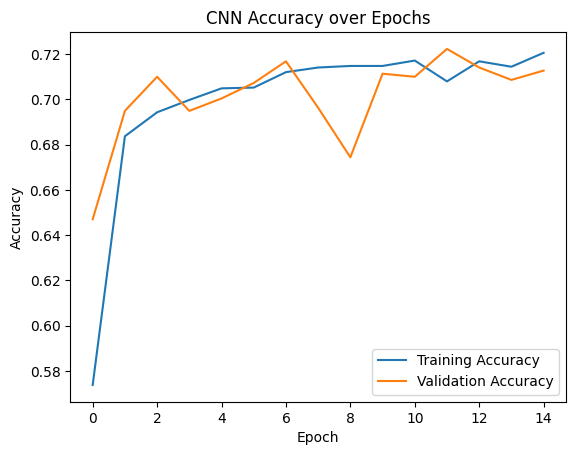

23/23 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6663 - loss: 0.8865
Validation Accuracy: 0.7086


In [10]:
# Step 6: Plot training results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 7: Evaluate
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")